In [22]:
#import libraries
import pandas as pd
import hvplot.pandas
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error, median_absolute_error, mean_squared_error, r2_score, explained_variance_score


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

import warnings
warnings.filterwarnings('ignore')

In [23]:
file = Path("Resources/clean_data_v.csv")
df = pd.read_csv(file, index_col='Unnamed: 0')
df.drop(columns=['depth'], inplace = True)
df.head()

,carat,table,price,x,y,z,color_D,color_E,color_F,color_G,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,55.0,326,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.21,61.0,326,3.89,3.84,2.31,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0.23,65.0,327,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,58.0,334,4.20,4.23,2.63,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.31,58.0,335,4.34,4.35,2.75,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
y = np.array(df['price']).reshape(-1, 1)
X = df.drop(columns = 'price')

In [25]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)


In [26]:
#set up a results data frame

results = pd.DataFrame(index = ['max_error', 'median_absolute_error', 'mean_squared_error', 'r2_score', 'explained_variance_score'], 
                       columns = ['DecisionTreeRegressor', 'GradientBoostingRegressor', 'RandomForestRegressor', 'VotingRegressor' ])




In [27]:
dt_reg = DecisionTreeRegressor(max_depth = 5)

dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)

results.loc['max_error','DecisionTreeRegressor'] = max_error(y_test, y_pred)
results.loc['median_absolute_error','DecisionTreeRegressor'] = median_absolute_error(y_test, y_pred)
results.loc['mean_squared_error','DecisionTreeRegressor'] = mean_squared_error(y_test, y_pred)
results.loc['r2_score','DecisionTreeRegressor'] = r2_score(y_test, y_pred)
results.loc['explained_variance_score','DecisionTreeRegressor'] = explained_variance_score(y_test, y_pred)



In [28]:
gb_reg = GradientBoostingRegressor(n_estimators =100)

gb_reg.fit(X_train, y_train)

y_pred_gb = gb_reg.predict(X_test)

results.loc['max_error','GradientBoostingRegressor'] = max_error(y_test, y_pred_gb)
results.loc['median_absolute_error','GradientBoostingRegressor'] = median_absolute_error(y_test, y_pred_gb)
results.loc['mean_squared_error','GradientBoostingRegressor'] = mean_squared_error(y_test, y_pred_gb)
results.loc['r2_score','GradientBoostingRegressor'] = r2_score(y_test, y_pred_gb)
results.loc['explained_variance_score','GradientBoostingRegressor'] = explained_variance_score(y_test, y_pred_gb)



In [29]:
rf_reg = RandomForestRegressor() #n_estimators =1000, max_depth = 15)

rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

results.loc['max_error','RandomForestRegressor'] = max_error(y_test, y_pred_rf)
results.loc['median_absolute_error','RandomForestRegressor'] = median_absolute_error(y_test, y_pred_rf)
results.loc['mean_squared_error','RandomForestRegressor'] = mean_squared_error(y_test, y_pred_rf)
results.loc['r2_score','RandomForestRegressor'] = r2_score(y_test, y_pred_rf)
results.loc['explained_variance_score','RandomForestRegressor'] = explained_variance_score(y_test, y_pred_rf)



In [30]:

reg1 = GradientBoostingRegressor(random_state=7, n_estimators=100)
reg2 = RandomForestRegressor(random_state=7, n_estimators=100)
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2)])
ereg = ereg.fit(X_train, y_train)

y_pred_vr = ereg.predict(X_test)

results.loc['max_error','VotingRegressor'] = max_error(y_test, y_pred_vr)
results.loc['median_absolute_error','VotingRegressor'] = median_absolute_error(y_test, y_pred_vr)
results.loc['mean_squared_error','VotingRegressor'] = mean_squared_error(y_test, y_pred_vr)
results.loc['r2_score','VotingRegressor'] = r2_score(y_test, y_pred_vr)
results.loc['explained_variance_score','VotingRegressor'] = explained_variance_score(y_test, y_pred_vr)




In [31]:
results

,DecisionTreeRegressor,GradientBoostingRegressor,RandomForestRegressor,VotingRegressor
max_error,13529.6,11930.2,12632.8,11436.9
median_absolute_error,279.484,188.348,100.35,128.052
mean_squared_error,1.4382e+06,554698,321866,365054
r2_score,0.908969,0.96489,0.979627,0.976894
explained_variance_score,0.908977,0.964893,0.979631,0.976897


In [32]:
decision_tree_regressions_df = pd.DataFrame({'y_test' : y_test.reshape(1,-1)[0], 
                                            'y_pred': y_pred_rf.reshape(1,-1)[0] })

decision_tree_regressions_df.hvplot.table()

:Table   [y_test,y_pred]

In [33]:
decision_tree_regressions_df.describe()

,y_test,y_pred
count,17801.000000,17801.000000
mean,3929.826190,3937.199752
std,3974.906564,3933.140179
min,327.000000,367.740000
25%,942.000000,945.820000
50%,2389.000000,2422.100000
75%,5392.000000,5362.480000
max,18806.000000,18085.180000


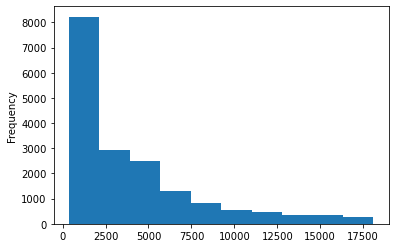

In [34]:
decision_tree_regressions_df['y_pred'].plot.hist(bins = 10)

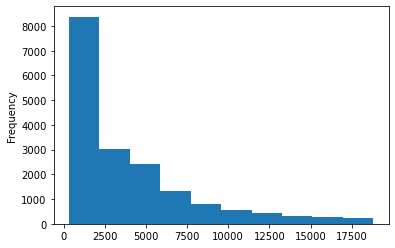

In [35]:
decision_tree_regressions_df['y_test'].plot.hist(bins = 10)

In [36]:
decision_tree_regressions_df[:300].hvplot.line(width = 1250, height =500)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [37]:
decision_tree_regressions_df.sum()

y_test    6.995484e+07
y_pred    7.008609e+07
dtype: float64

In [38]:
print(f'Total price of all diamonds in the test sample is', format(decision_tree_regressions_df.sum()[0],',.0f') )
print(f'Total predicted price of all diamonds is', format(decision_tree_regressions_df.sum()[1],',.0f'))

Total price of all diamonds in the test sample is 69,954,836
Total predicted price of all diamonds is 70,086,093


In [39]:
Total_delta = (decision_tree_regressions_df.sum()[1] - decision_tree_regressions_df.sum()[0] ) #/ 
print(f'Total delta is $', format(Total_delta, ',.0f'))
print('Delta as % of total price is', format(Total_delta/decision_tree_regressions_df.sum()[0] , ',.2%') )

Total delta is $ 131,257
Delta as % of total price is 0.19%


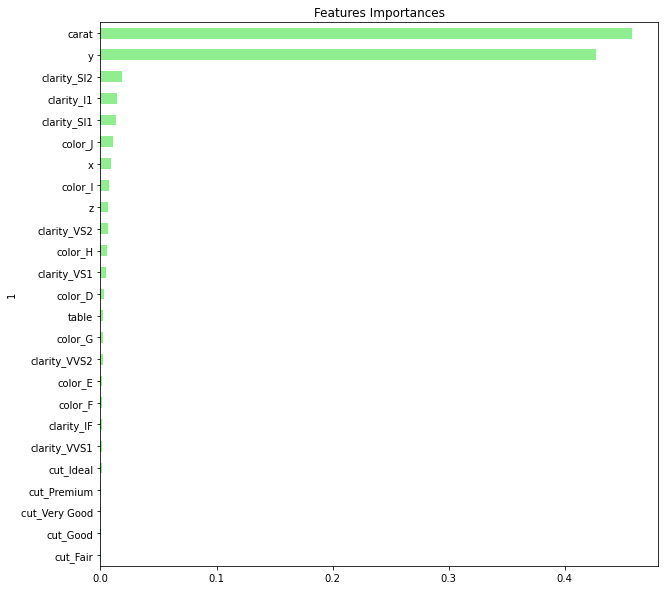

In [40]:
# List the features sorted in descending order by feature importance for Random Forrest Regressor
importances = rf_reg.feature_importances_

importances_df = pd.DataFrame(sorted(zip(  rf_reg.feature_importances_, X_train.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False, figsize = (10,10))

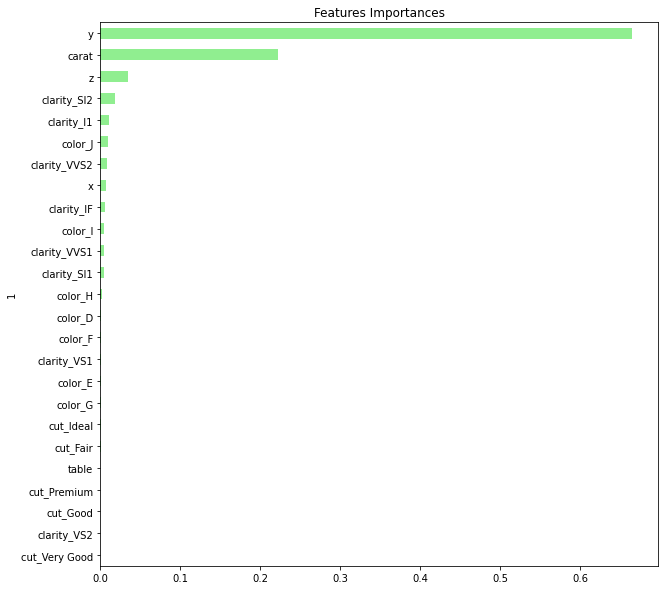

In [41]:

importances = gb_reg.feature_importances_

importances_df = pd.DataFrame(sorted(zip(  gb_reg.feature_importances_, X_train.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False, figsize = (10,10))


# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [100, 200, 300],
    'max_depth' : [4,5,6]
}

CV_rfc = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_ 